# Exploratory Data Analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import regex as re

In [2]:
pd.set_option('display.max_columns', None)

Importing the data prepared in 'data-cleaning-processing.ipynb' again using the 'ISO-8859-1' codec.

In [3]:
balance_historic = pd.read_csv('processed data/balance_historic.csv', encoding='ISO-8859-1').drop(['Unnamed: 0'], axis = 1)

balance = pd.read_csv('processed data/balance.csv', encoding='ISO-8859-1').drop(['Unnamed: 0'], axis = 1)

display(balance.shape)
display(balance.head(10))

display(balance_historic.shape)
display(balance_historic.head(10))

(1958440, 7)

,area,item_code_cpc,item,element,unit,year,value
0,Afghanistan,'S2501,Population,Total Population - Both sexes,1000 persons,2010,29186.00
1,Afghanistan,'S2901,Grand Total,Food supply,kcal/capita/day,2010,2170.00
2,Afghanistan,'S2901,Grand Total,Protein supply quantity,g/capita/day,2010,59.23
3,Afghanistan,'S2901,Grand Total,Fat supply quantity,g/capita/day,2010,36.69
4,Afghanistan,'S2903,Vegetal Products,Food supply,kcal/capita/day,2010,1964.00
5,Afghanistan,'S2903,Vegetal Products,Protein supply quantity,g/capita/day,2010,47.42
6,Afghanistan,'S2903,Vegetal Products,Fat supply quantity,g/capita/day,2010,22.33
7,Afghanistan,'S2941,Animal Products,Food supply,kcal/capita/day,2010,206.00
8,Afghanistan,'S2941,Animal Products,Protein supply quantity,g/capita/day,2010,11.81
9,Afghanistan,'S2941,Animal Products,Fat supply quantity,g/capita/day,2010,14.36


(8119335, 7)

,area,item_code_cpc,item,element,unit,year,value
0,Afghanistan,'S2501,Population,Total Population - Both sexes,1000 persons,1961,8954.00
1,Afghanistan,'S2901,Grand Total,Food supply,kcal/capita/day,1961,2999.00
2,Afghanistan,'S2901,Grand Total,Protein supply quantity,g/capita/day,1961,84.91
3,Afghanistan,'S2901,Grand Total,Fat supply quantity,g/capita/day,1961,37.51
4,Afghanistan,'S2903,Vegetal Products,Food supply,kcal/capita/day,1961,2752.00
5,Afghanistan,'S2903,Vegetal Products,Protein supply quantity,g/capita/day,1961,71.38
6,Afghanistan,'S2903,Vegetal Products,Fat supply quantity,g/capita/day,1961,19.07
7,Afghanistan,'S2941,Animal Products,Food supply,kcal/capita/day,1961,247.00
8,Afghanistan,'S2941,Animal Products,Protein supply quantity,g/capita/day,1961,13.53
9,Afghanistan,'S2941,Animal Products,Fat supply quantity,g/capita/day,1961,18.44


In the 'balance_historic' and 'balance' datasets, useful *features* are buried within the 'element' column.

I will concatenate 'element' column values with the 'unit' column and then extract these out as column headers themselves.

In [4]:
balance['element_unit'] = balance[['element', 'unit']].apply(lambda row: '_'.join(row.values.astype(str)), axis=1)
balance_historic['element_unit'] = balance_historic[['element', 'unit']].apply(lambda row: '_'.join(row.values.astype(str)), axis=1)

balance.head(10)

,area,item_code_cpc,item,element,unit,year,value,element_unit
0,Afghanistan,'S2501,Population,Total Population - Both sexes,1000 persons,2010,29186.00,Total Population - Both sexes_1000 persons
1,Afghanistan,'S2901,Grand Total,Food supply,kcal/capita/day,2010,2170.00,Food supply _kcal/capita/day
2,Afghanistan,'S2901,Grand Total,Protein supply quantity,g/capita/day,2010,59.23,Protein supply quantity _g/capita/day
3,Afghanistan,'S2901,Grand Total,Fat supply quantity,g/capita/day,2010,36.69,Fat supply quantity _g/capita/day
4,Afghanistan,'S2903,Vegetal Products,Food supply,kcal/capita/day,2010,1964.00,Food supply _kcal/capita/day
5,Afghanistan,'S2903,Vegetal Products,Protein supply quantity,g/capita/day,2010,47.42,Protein supply quantity _g/capita/day
6,Afghanistan,'S2903,Vegetal Products,Fat supply quantity,g/capita/day,2010,22.33,Fat supply quantity _g/capita/day
7,Afghanistan,'S2941,Animal Products,Food supply,kcal/capita/day,2010,206.00,Food supply _kcal/capita/day
8,Afghanistan,'S2941,Animal Products,Protein supply quantity,g/capita/day,2010,11.81,Protein supply quantity _g/capita/day
9,Afghanistan,'S2941,Animal Products,Fat supply quantity,g/capita/day,2010,14.36,Fat supply quantity _g/capita/day


In [5]:
def restructure_pivot(df):
       
    df_pivot = df.pivot_table(index = ['area','year','item_code_cpc','item'], columns=['element_unit'], aggfunc = {'value':'sum'})
    
    col_list = []
    for col in df_pivot.columns:
        col_list.append(col[1])

    df_pivot.columns = col_list

    df_pivot = df_pivot.reset_index()
    
    return df_pivot

In [6]:
balance_pivot = restructure_pivot(balance)
display(balance_pivot.head(10))

balance_historic_pivot = restructure_pivot(balance_historic)
balance_historic_pivot.head(10)

,area,year,item_code_cpc,item,Export Quantity_1000 tonnes,Fat supply quantity _g/capita/day,Food supply _kcal/capita/day,Food_1000 tonnes,Import Quantity_1000 tonnes,Losses_1000 tonnes,Production_1000 tonnes,Protein supply quantity _g/capita/day,Total Population - Both sexes_1000 persons
0,Afghanistan,2010,'S2501,Population,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,29186.0
1,Afghanistan,2010,'S2511,Wheat and products,0.0,5.18,1442.17,4924.0,1860.0,678.0,4532.0,38.86,NaN
2,Afghanistan,2010,'S2513,Barley and products,0.0,0.09,9.79,32.0,3.0,65.0,437.0,0.30,NaN
3,Afghanistan,2010,'S2514,Maize and products,0.0,0.22,15.55,54.0,0.0,45.0,301.0,0.41,NaN
4,Afghanistan,2010,'S2515,Rye and products,0.0,0.00,0.00,0.0,0.0,NaN,0.0,0.00,NaN
5,Afghanistan,2010,'S2516,Oats,0.0,0.00,0.00,0.0,0.0,NaN,0.0,0.00,NaN
6,Afghanistan,2010,'S2517,Millet and products,0.0,0.02,3.81,14.0,0.0,1.0,15.0,0.09,NaN
7,Afghanistan,2010,'S2518,Sorghum and products,0.0,0.00,0.00,0.0,0.0,NaN,NaN,0.00,NaN
8,Afghanistan,2010,'S2520,"Cereals, Other",0.0,0.00,0.00,0.0,0.0,NaN,0.0,0.00,NaN
9,Afghanistan,2010,'S2531,Potatoes and products,26.0,0.04,13.28,189.0,0.0,11.0,246.0,0.21,NaN


,area,year,item_code_cpc,item,Export Quantity_1000 tonnes,Fat supply quantity _g/capita/day,Food supply _kcal/capita/day,Food_1000 tonnes,Import Quantity_1000 tonnes,Losses_1000 tonnes,Production_1000 tonnes,Protein supply quantity _g/capita/day,Total Population - Both sexes_1000 persons
0,Afghanistan,1961,'S2501,Population,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8954.0
1,Afghanistan,1961,'S2511,Wheat and products,NaN,5.52,1688.30,1928.0,32.0,185.0,2279.0,45.54,NaN
2,Afghanistan,1961,'S2513,Barley and products,NaN,2.17,236.73,237.0,0.0,38.0,378.0,7.17,NaN
3,Afghanistan,1961,'S2514,Maize and products,0.0,5.34,380.00,403.0,0.0,70.0,700.0,10.05,NaN
4,Afghanistan,1961,'S2517,Millet and products,NaN,0.10,15.51,17.0,NaN,1.0,19.0,0.37,NaN
5,Afghanistan,1961,'S2520,"Cereals, Other",NaN,0.00,0.00,0.0,0.0,NaN,NaN,0.00,NaN
6,Afghanistan,1961,'S2531,Potatoes and products,0.0,0.07,25.50,111.0,0.0,4.0,130.0,0.41,NaN
7,Afghanistan,1961,'S2536,Sugar cane,NaN,NaN,NaN,NaN,NaN,NaN,45.0,NaN,NaN
8,Afghanistan,1961,'S2537,Sugar beet,NaN,NaN,NaN,NaN,NaN,NaN,42.0,NaN,NaN
9,Afghanistan,1961,'S2542,Sugar (Raw Equivalent),NaN,NaN,49.02,45.0,45.0,NaN,5.0,NaN,NaN


Further, 'Population' data in the datsets is an area-level parameter rather than another nutrition row value. Therefore it should be a column itself rather than a category of the 'item' column. I will need this feature to make sense of the other dataset features (many of which are scaled by population eg. Food supply kcal/capita/day).

In [7]:
def population(df):
    # first create a dataframe containing only rows for 'item' = 'Population'
    pop = df[df.item == 'Population'][['area','year','Total Population - Both sexes_1000 persons']].copy()
    
    # drop all 'population' columns and rows from the original dataframe
    df = df.drop(['Total Population - Both sexes_1000 persons'],axis=1)
    df.drop(df[df['item'] == 'Population'].index, inplace = True)
    
    # merge them back together
    df = pd.merge(df, pop,  how='inner', left_on=['area','year'], right_on = ['area','year'])
    
    return df

In [8]:
balance_pivot = population(balance_pivot)

balance_historic_pivot = population(balance_historic_pivot)

balance_pivot.head(10)

,area,year,item_code_cpc,item,Export Quantity_1000 tonnes,Fat supply quantity _g/capita/day,Food supply _kcal/capita/day,Food_1000 tonnes,Import Quantity_1000 tonnes,Losses_1000 tonnes,Production_1000 tonnes,Protein supply quantity _g/capita/day,Total Population - Both sexes_1000 persons
0,Afghanistan,2010,'S2511,Wheat and products,0.0,5.18,1442.17,4924.0,1860.0,678.0,4532.0,38.86,29186.0
1,Afghanistan,2010,'S2513,Barley and products,0.0,0.09,9.79,32.0,3.0,65.0,437.0,0.30,29186.0
2,Afghanistan,2010,'S2514,Maize and products,0.0,0.22,15.55,54.0,0.0,45.0,301.0,0.41,29186.0
3,Afghanistan,2010,'S2515,Rye and products,0.0,0.00,0.00,0.0,0.0,NaN,0.0,0.00,29186.0
4,Afghanistan,2010,'S2516,Oats,0.0,0.00,0.00,0.0,0.0,NaN,0.0,0.00,29186.0
5,Afghanistan,2010,'S2517,Millet and products,0.0,0.02,3.81,14.0,0.0,1.0,15.0,0.09,29186.0
6,Afghanistan,2010,'S2518,Sorghum and products,0.0,0.00,0.00,0.0,0.0,NaN,NaN,0.00,29186.0
7,Afghanistan,2010,'S2520,"Cereals, Other",0.0,0.00,0.00,0.0,0.0,NaN,0.0,0.00,29186.0
8,Afghanistan,2010,'S2531,Potatoes and products,26.0,0.04,13.28,189.0,0.0,11.0,246.0,0.21,29186.0
9,Afghanistan,2010,'S2532,Cassava and products,0.0,0.00,0.00,0.0,0.0,NaN,NaN,0.00,29186.0


At this point, we need to create some new calculated columns and reformat the column headers.

We will aggregate these datasets, so having absolute values on each line rather than per capita values will be necessary.

In [9]:
def new_columns(df):
    df['population'] = 1000 * df['Total Population - Both sexes_1000 persons']
    df['food_supply_kcal_per_day'] = df['Food supply _kcal/capita/day'] * df['population']
    df['fat_supply_g_per_day'] = df['Fat supply quantity _g/capita/day'] * df['population']
    df['protein_supply_g_per_day'] = df['Protein supply quantity _g/capita/day'] * df['population']
        
    # this is a useful column from which to calculate aggregated values
    # NB. I do not want to introduce 'inf' values so will ignore lines where 'Food_1000 tonnes' = 0
    df['kcal_per_1000tonnes'] = np.where(df['Food_1000 tonnes']>0, 365 * df['food_supply_kcal_per_day'] / df['Food_1000 tonnes'], None)

    df = df.drop(['Total Population - Both sexes_1000 persons'], axis=1)
    
    df.columns = [x.lower() for x in df.columns]
    df.columns = df.columns.str.replace(" ", "_")
    
    return df

In [10]:
balance_pivot = new_columns(balance_pivot)

balance_historic_pivot = new_columns(balance_historic_pivot)

balance_pivot.head(10)

,area,year,item_code_cpc,item,export_quantity_1000_tonnes,fat_supply_quantity__g/capita/day,food_supply__kcal/capita/day,food_1000_tonnes,import_quantity_1000_tonnes,losses_1000_tonnes,production_1000_tonnes,protein_supply_quantity__g/capita/day,population,food_supply_kcal_per_day,fat_supply_g_per_day,protein_supply_g_per_day,kcal_per_1000tonnes
0,Afghanistan,2010,'S2511,Wheat and products,0.0,5.18,1442.17,4924.0,1860.0,678.0,4532.0,38.86,29186000.0,4.209117e+10,151183480.0,1.134168e+09,3120080904.000813
1,Afghanistan,2010,'S2513,Barley and products,0.0,0.09,9.79,32.0,3.0,65.0,437.0,0.30,29186000.0,2.857309e+08,2626740.0,8.755800e+06,3259118534.375
2,Afghanistan,2010,'S2514,Maize and products,0.0,0.22,15.55,54.0,0.0,45.0,301.0,0.41,29186000.0,4.538423e+08,6420920.0,1.196626e+07,3067637768.518518
3,Afghanistan,2010,'S2515,Rye and products,0.0,0.00,0.00,0.0,0.0,NaN,0.0,0.00,29186000.0,0.000000e+00,0.0,0.000000e+00,None
4,Afghanistan,2010,'S2516,Oats,0.0,0.00,0.00,0.0,0.0,NaN,0.0,0.00,29186000.0,0.000000e+00,0.0,0.000000e+00,None
5,Afghanistan,2010,'S2517,Millet and products,0.0,0.02,3.81,14.0,0.0,1.0,15.0,0.09,29186000.0,1.111987e+08,583720.0,2.626740e+06,2899107921.428571
6,Afghanistan,2010,'S2518,Sorghum and products,0.0,0.00,0.00,0.0,0.0,NaN,NaN,0.00,29186000.0,0.000000e+00,0.0,0.000000e+00,None
7,Afghanistan,2010,'S2520,"Cereals, Other",0.0,0.00,0.00,0.0,0.0,NaN,0.0,0.00,29186000.0,0.000000e+00,0.0,0.000000e+00,None
8,Afghanistan,2010,'S2531,Potatoes and products,26.0,0.04,13.28,189.0,0.0,11.0,246.0,0.21,29186000.0,3.875901e+08,1167440.0,6.129060e+06,748520524.867725
9,Afghanistan,2010,'S2532,Cassava and products,0.0,0.00,0.00,0.0,0.0,NaN,NaN,0.00,29186000.0,0.000000e+00,0.0,0.000000e+00,None


In [11]:
balance_pivot.isna().sum()

area                                          0
year                                          0
item_code_cpc                                 0
item                                          0
export_quantity_1000_tonnes               30030
fat_supply_quantity__g/capita/day         17413
food_supply__kcal/capita/day              17611
food_1000_tonnes                          23595
import_quantity_1000_tonnes                9504
losses_1000_tonnes                       153439
production_1000_tonnes                    76791
protein_supply_quantity__g/capita/day     17369
population                                    0
food_supply_kcal_per_day                  17611
fat_supply_g_per_day                      17413
protein_supply_g_per_day                  17369
kcal_per_1000tonnes                       95574
dtype: int64

I will make the assumption that all null values are actually an absence of a value, so will replace them with zero.

However, the 'kcal_per_1000tonnes' should never contain a null as every listed 'item' should have some inherent calorie value.

I will first replace all nulls in this column with an average *global* value calculated for each item from the other rows where we do not have nulls. This is a crude measure but is a quick fix for this missing data.

Then I will replace all remaining nulls in the dataframe with zero.

In [12]:
balance_pivot[balance_pivot.item == 'Alcohol, Non-Food']['food_supply__kcal/capita/day'].value_counts(dropna=False)

NaN    2420
Name: food_supply__kcal/capita/day, dtype: int64

Item values 'Alcohol, Non-Food' and 'Meat, Aquatic Mammals' always return 0 or Null for 'food_supply__kcal/capita/day'. These are therefore not contributing anything to the overall analysis so will be dropped.

In [13]:
def kcal_replacement(df):
    
    df.drop(df[(df['item'] == 'Alcohol, Non-Food')&(df['item'] == 'Meat, Aquatic Mammals')].index, inplace = True)
    
    # create a filtered dataframe to take the mean values from
    df_f = df[df['kcal_per_1000tonnes'].isna()==False]
    
    item = df_f.groupby(['item']).agg({'kcal_per_1000tonnes':np.mean}).reset_index()
    
    item.columns = ['item','average_kcal_per_1000tonnes']
    
    # merge this back into the original dataframe
    df = pd.merge(left = df, right = item, how = 'left', on = 'item')
    
    # replace all null values with the average
    df['kcal_per_1000tonnes'] = np.where(df['kcal_per_1000tonnes'].isna()==True, df['average_kcal_per_1000tonnes'], df['kcal_per_1000tonnes'])
    
    # drop the average column
    df = df.drop(['average_kcal_per_1000tonnes'], axis=1)
    
    return df            

In [14]:
balance_pivot = kcal_replacement(balance_pivot)

balance_historic_pivot = kcal_replacement(balance_historic_pivot)

display(balance_pivot.isna().sum())

balance_historic_pivot.isna().sum()

area                                          0
year                                          0
item_code_cpc                                 0
item                                          0
export_quantity_1000_tonnes               30030
fat_supply_quantity__g/capita/day         17413
food_supply__kcal/capita/day              17611
food_1000_tonnes                          23595
import_quantity_1000_tonnes                9504
losses_1000_tonnes                       153439
production_1000_tonnes                    76791
protein_supply_quantity__g/capita/day     17369
population                                    0
food_supply_kcal_per_day                  17611
fat_supply_g_per_day                      17413
protein_supply_g_per_day                  17369
kcal_per_1000tonnes                       11946
dtype: int64

area                                          0
year                                          0
item_code_cpc                                 0
item                                          0
export_quantity_1000_tonnes              253605
fat_supply_quantity__g/capita/day        266802
food_supply__kcal/capita/day              88934
food_1000_tonnes                         138224
import_quantity_1000_tonnes               84270
losses_1000_tonnes                       864271
production_1000_tonnes                   447744
protein_supply_quantity__g/capita/day    257580
population                                    0
food_supply_kcal_per_day                  88934
fat_supply_g_per_day                     266802
protein_supply_g_per_day                 257580
kcal_per_1000tonnes                       45421
dtype: int64

Now that we have that critical column populated, we can replace all remaining nulls with 0.

In [15]:
balance_pivot = balance_pivot.fillna(0)
balance_historic_pivot = balance_historic_pivot.fillna(0)

In [16]:
def new_columns2(df):
    df['prod_kcal_per_day'] = df.production_1000_tonnes * df.kcal_per_1000tonnes / 365
    df['export_kcal_per_day'] = df.export_quantity_1000_tonnes * df.kcal_per_1000tonnes / 365
    df['import_kcal_per_day'] = df.import_quantity_1000_tonnes * df.kcal_per_1000tonnes / 365
    df['loss_kcal_per_day'] = df.losses_1000_tonnes * df.kcal_per_1000tonnes / 365
    
    return df

In [17]:
balance_pivot = new_columns2(balance_pivot)
balance_historic_pivot = new_columns2(balance_historic_pivot)

balance_pivot.head()

,area,year,item_code_cpc,item,export_quantity_1000_tonnes,fat_supply_quantity__g/capita/day,food_supply__kcal/capita/day,food_1000_tonnes,import_quantity_1000_tonnes,losses_1000_tonnes,production_1000_tonnes,protein_supply_quantity__g/capita/day,population,food_supply_kcal_per_day,fat_supply_g_per_day,protein_supply_g_per_day,kcal_per_1000tonnes,prod_kcal_per_day,export_kcal_per_day,import_kcal_per_day,loss_kcal_per_day
0,Afghanistan,2010,'S2511,Wheat and products,0.0,5.18,1442.17,4924.0,1860.0,678.0,4532.0,38.86,29186000.0,4.209117e+10,151183480.0,1.134168e+09,3.120081e+09,3.874029e+10,0.0,1.589959e+10,5.795657e+09
1,Afghanistan,2010,'S2513,Barley and products,0.0,0.09,9.79,32.0,3.0,65.0,437.0,0.30,29186000.0,2.857309e+08,2626740.0,8.755800e+06,3.259119e+09,3.902013e+09,0.0,2.678728e+07,5.803910e+08
2,Afghanistan,2010,'S2514,Maize and products,0.0,0.22,15.55,54.0,0.0,45.0,301.0,0.41,29186000.0,4.538423e+08,6420920.0,1.196626e+07,3.067638e+09,2.529751e+09,0.0,0.000000e+00,3.782019e+08
3,Afghanistan,2010,'S2515,Rye and products,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.00,29186000.0,0.000000e+00,0.0,0.000000e+00,2.738801e+09,0.000000e+00,0.0,0.000000e+00,0.000000e+00
4,Afghanistan,2010,'S2516,Oats,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.00,29186000.0,0.000000e+00,0.0,0.000000e+00,2.576355e+09,0.000000e+00,0.0,0.000000e+00,0.000000e+00


Now is a good opportunity to merge in the 'country' dataframe.

In [18]:
countries = pd.read_csv('processed data/countries.csv', encoding='ISO-8859-1').drop(['Unnamed: 0'], axis = 1)

display(countries.head())

balance_pivot = pd.merge(left = balance_pivot,
                                 right = countries,
                                 how = 'inner', 
                                 left_on = "area", 
                                 right_on= "country_or_area").drop('country_or_area', axis=1)

balance_historic_pivot = pd.merge(left = balance_historic_pivot,
                                 right = countries,
                                 how = 'inner', 
                                 left_on = "area", 
                                 right_on= "country_or_area").drop('country_or_area', axis=1)
                                 
balance_pivot.head()

,region_name,sub_region_name,country_or_area,iso_alpha3_code,least_developed_countries_ldc
0,Africa,Northern Africa,Algeria,DZA,0
1,Africa,Northern Africa,Egypt,EGY,0
2,Africa,Northern Africa,Libya,LBY,0
3,Africa,Northern Africa,Morocco,MAR,0
4,Africa,Northern Africa,Sudan,SDN,1


,area,year,item_code_cpc,item,export_quantity_1000_tonnes,fat_supply_quantity__g/capita/day,food_supply__kcal/capita/day,food_1000_tonnes,import_quantity_1000_tonnes,losses_1000_tonnes,production_1000_tonnes,protein_supply_quantity__g/capita/day,population,food_supply_kcal_per_day,fat_supply_g_per_day,protein_supply_g_per_day,kcal_per_1000tonnes,prod_kcal_per_day,export_kcal_per_day,import_kcal_per_day,loss_kcal_per_day,region_name,sub_region_name,iso_alpha3_code,least_developed_countries_ldc
0,Afghanistan,2010,'S2511,Wheat and products,0.0,5.18,1442.17,4924.0,1860.0,678.0,4532.0,38.86,29186000.0,4.209117e+10,151183480.0,1.134168e+09,3.120081e+09,3.874029e+10,0.0,1.589959e+10,5.795657e+09,Asia,Southern Asia,AFG,1
1,Afghanistan,2010,'S2513,Barley and products,0.0,0.09,9.79,32.0,3.0,65.0,437.0,0.30,29186000.0,2.857309e+08,2626740.0,8.755800e+06,3.259119e+09,3.902013e+09,0.0,2.678728e+07,5.803910e+08,Asia,Southern Asia,AFG,1
2,Afghanistan,2010,'S2514,Maize and products,0.0,0.22,15.55,54.0,0.0,45.0,301.0,0.41,29186000.0,4.538423e+08,6420920.0,1.196626e+07,3.067638e+09,2.529751e+09,0.0,0.000000e+00,3.782019e+08,Asia,Southern Asia,AFG,1
3,Afghanistan,2010,'S2515,Rye and products,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.00,29186000.0,0.000000e+00,0.0,0.000000e+00,2.738801e+09,0.000000e+00,0.0,0.000000e+00,0.000000e+00,Asia,Southern Asia,AFG,1
4,Afghanistan,2010,'S2516,Oats,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.00,29186000.0,0.000000e+00,0.0,0.000000e+00,2.576355e+09,0.000000e+00,0.0,0.000000e+00,0.000000e+00,Asia,Southern Asia,AFG,1


In [19]:
# balance_pivot.to_csv('presentation data/balance_pivot.csv')
# balance_historic_pivot.to_csv('presentation data/balance_historic_pivot.csv')

For the aggregated national analysis, we only require item = 'Grand Total','Vegetal Products','Animal Products' and from this we can calculate the proportion of Total kcal derived from Animal Products. This will be an interesting feature for our model.

In [20]:
balance_national = balance_pivot[balance_pivot['item'].isin(['Grand Total','Vegetal Products','Animal Products'])==True].copy()

balance_historic_national = balance_historic_pivot[balance_historic_pivot['item'].isin(['Grand Total','Vegetal Products','Animal Products'])==True].copy()

balance_national.head(10)

,area,year,item_code_cpc,item,export_quantity_1000_tonnes,fat_supply_quantity__g/capita/day,food_supply__kcal/capita/day,food_1000_tonnes,import_quantity_1000_tonnes,losses_1000_tonnes,production_1000_tonnes,protein_supply_quantity__g/capita/day,population,food_supply_kcal_per_day,fat_supply_g_per_day,protein_supply_g_per_day,kcal_per_1000tonnes,prod_kcal_per_day,export_kcal_per_day,import_kcal_per_day,loss_kcal_per_day,region_name,sub_region_name,iso_alpha3_code,least_developed_countries_ldc
91,Afghanistan,2010,'S2901,Grand Total,0.0,36.69,2170.0,0.0,0.0,0.0,0.0,59.23,29186000.0,6.333362e+10,1.070834e+09,1.728687e+09,0.0,0.0,0.0,0.0,0.0,Asia,Southern Asia,AFG,1
92,Afghanistan,2010,'S2903,Vegetal Products,0.0,22.33,1964.0,0.0,0.0,0.0,0.0,47.42,29186000.0,5.732130e+10,6.517234e+08,1.384000e+09,0.0,0.0,0.0,0.0,0.0,Asia,Southern Asia,AFG,1
107,Afghanistan,2010,'S2941,Animal Products,0.0,14.36,206.0,0.0,0.0,0.0,0.0,11.81,29186000.0,6.012316e+09,4.191110e+08,3.446867e+08,0.0,0.0,0.0,0.0,0.0,Asia,Southern Asia,AFG,1
206,Afghanistan,2011,'S2901,Grand Total,0.0,34.81,2152.0,0.0,0.0,0.0,0.0,58.00,30117000.0,6.481178e+10,1.048373e+09,1.746786e+09,0.0,0.0,0.0,0.0,0.0,Asia,Southern Asia,AFG,1
207,Afghanistan,2011,'S2903,Vegetal Products,0.0,20.93,1953.0,0.0,0.0,0.0,0.0,46.44,30117000.0,5.881850e+10,6.303488e+08,1.398633e+09,0.0,0.0,0.0,0.0,0.0,Asia,Southern Asia,AFG,1
222,Afghanistan,2011,'S2941,Animal Products,0.0,13.88,200.0,0.0,0.0,0.0,0.0,11.57,30117000.0,6.023400e+09,4.180240e+08,3.484537e+08,0.0,0.0,0.0,0.0,0.0,Asia,Southern Asia,AFG,1
321,Afghanistan,2012,'S2901,Grand Total,0.0,36.53,2159.0,0.0,0.0,0.0,0.0,57.82,31161000.0,6.727660e+10,1.138311e+09,1.801729e+09,0.0,0.0,0.0,0.0,0.0,Asia,Southern Asia,AFG,1
322,Afghanistan,2012,'S2903,Vegetal Products,0.0,22.56,1955.0,0.0,0.0,0.0,0.0,45.92,31161000.0,6.091976e+10,7.029922e+08,1.430913e+09,0.0,0.0,0.0,0.0,0.0,Asia,Southern Asia,AFG,1
337,Afghanistan,2012,'S2941,Animal Products,0.0,13.96,204.0,0.0,0.0,0.0,0.0,11.90,31161000.0,6.356844e+09,4.350076e+08,3.708159e+08,0.0,0.0,0.0,0.0,0.0,Asia,Southern Asia,AFG,1
436,Afghanistan,2013,'S2901,Grand Total,0.0,37.10,2196.0,0.0,0.0,0.0,0.0,57.71,32270000.0,7.086492e+10,1.197217e+09,1.862302e+09,0.0,0.0,0.0,0.0,0.0,Asia,Southern Asia,AFG,1


In [21]:
balance_national.columns

Index(['area', 'year', 'item_code_cpc', 'item', 'export_quantity_1000_tonnes',
       'fat_supply_quantity__g/capita/day', 'food_supply__kcal/capita/day',
       'food_1000_tonnes', 'import_quantity_1000_tonnes', 'losses_1000_tonnes',
       'production_1000_tonnes', 'protein_supply_quantity__g/capita/day',
       'population', 'food_supply_kcal_per_day', 'fat_supply_g_per_day',
       'protein_supply_g_per_day', 'kcal_per_1000tonnes', 'prod_kcal_per_day',
       'export_kcal_per_day', 'import_kcal_per_day', 'loss_kcal_per_day',
       'region_name', 'sub_region_name', 'iso_alpha3_code',
       'least_developed_countries_ldc'],
      dtype='object')

In [22]:
balance_national = balance_national[['region_name', 'sub_region_name', 'iso_alpha3_code',
                                     'least_developed_countries_ldc', 'area', 'year', 'population',
                                     'item_code_cpc', 'item',
                                     'food_supply_kcal_per_day','food_supply__kcal/capita/day',
                                     'protein_supply_g_per_day','protein_supply_quantity__g/capita/day',
                                     'fat_supply_g_per_day','fat_supply_quantity__g/capita/day']]

balance_historic_national = balance_historic_national[['region_name', 'sub_region_name', 'iso_alpha3_code',
                                     'least_developed_countries_ldc', 'area', 'year', 'population',
                                     'item_code_cpc', 'item',
                                     'food_supply_kcal_per_day','food_supply__kcal/capita/day',
                                     'protein_supply_g_per_day','protein_supply_quantity__g/capita/day',
                                     'fat_supply_g_per_day','fat_supply_quantity__g/capita/day']]

balance_national.head()

,region_name,sub_region_name,iso_alpha3_code,least_developed_countries_ldc,area,year,population,item_code_cpc,item,food_supply_kcal_per_day,food_supply__kcal/capita/day,protein_supply_g_per_day,protein_supply_quantity__g/capita/day,fat_supply_g_per_day,fat_supply_quantity__g/capita/day
91,Asia,Southern Asia,AFG,1,Afghanistan,2010,29186000.0,'S2901,Grand Total,6.333362e+10,2170.0,1.728687e+09,59.23,1.070834e+09,36.69
92,Asia,Southern Asia,AFG,1,Afghanistan,2010,29186000.0,'S2903,Vegetal Products,5.732130e+10,1964.0,1.384000e+09,47.42,6.517234e+08,22.33
107,Asia,Southern Asia,AFG,1,Afghanistan,2010,29186000.0,'S2941,Animal Products,6.012316e+09,206.0,3.446867e+08,11.81,4.191110e+08,14.36
206,Asia,Southern Asia,AFG,1,Afghanistan,2011,30117000.0,'S2901,Grand Total,6.481178e+10,2152.0,1.746786e+09,58.00,1.048373e+09,34.81
207,Asia,Southern Asia,AFG,1,Afghanistan,2011,30117000.0,'S2903,Vegetal Products,5.881850e+10,1953.0,1.398633e+09,46.44,6.303488e+08,20.93


In [23]:
def animal_derived(df):
        # create a summary table where the item values have become columns
        df1 = df.pivot_table(index = ['area','year'], columns=['item'], aggfunc = {'food_supply_kcal_per_day':'sum'}).reset_index()
        df1.columns = ['area','year','animal_kcal_per_day','total_kcal_per_day','vegetal_kcal_per_day']
        
        # find the proportion of kcal_per_day derived from Animal products
        df1['animal_derived'] = df1.animal_kcal_per_day / df1.total_kcal_per_day
        df1 = df1.drop(['animal_kcal_per_day','total_kcal_per_day','vegetal_kcal_per_day'], axis=1)
        
        df = pd.merge(left = df, right = df1, how = 'left', on = ['area','year'])
        
        df.drop(df[(df['item'] == 'Vegetal Products') | (df['item'] == 'Animal Products')].index, inplace = True)
        
        df = df.drop(['item_code_cpc','item'], axis=1)
        
        return df

In [24]:
balance_national = animal_derived(balance_national)
balance_historic_national = animal_derived(balance_historic_national)

balance_national.head(20)

,region_name,sub_region_name,iso_alpha3_code,least_developed_countries_ldc,area,year,population,food_supply_kcal_per_day,food_supply__kcal/capita/day,protein_supply_g_per_day,protein_supply_quantity__g/capita/day,fat_supply_g_per_day,fat_supply_quantity__g/capita/day,animal_derived
0,Asia,Southern Asia,AFG,1,Afghanistan,2010,29186000.0,6.333362e+10,2170.0,1.728687e+09,59.23,1.070834e+09,36.69,0.094931
3,Asia,Southern Asia,AFG,1,Afghanistan,2011,30117000.0,6.481178e+10,2152.0,1.746786e+09,58.00,1.048373e+09,34.81,0.092937
6,Asia,Southern Asia,AFG,1,Afghanistan,2012,31161000.0,6.727660e+10,2159.0,1.801729e+09,57.82,1.138311e+09,36.53,0.094488
9,Asia,Southern Asia,AFG,1,Afghanistan,2013,32270000.0,7.086492e+10,2196.0,1.862302e+09,57.71,1.197217e+09,37.10,0.092896
12,Asia,Southern Asia,AFG,1,Afghanistan,2014,33371000.0,7.558532e+10,2265.0,2.007933e+09,60.17,1.384229e+09,41.48,0.108609
15,Asia,Southern Asia,AFG,1,Afghanistan,2015,34414000.0,7.743150e+10,2250.0,2.011498e+09,58.45,1.317368e+09,38.28,0.093778
18,Asia,Southern Asia,AFG,1,Afghanistan,2016,35383000.0,7.883332e+10,2228.0,2.068490e+09,58.46,1.440088e+09,40.70,0.091562
21,Asia,Southern Asia,AFG,1,Afghanistan,2017,36296000.0,8.358969e+10,2303.0,2.159612e+09,59.50,1.452929e+09,40.03,0.084672
24,Asia,Southern Asia,AFG,1,Afghanistan,2018,37172000.0,8.438044e+10,2270.0,2.143338e+09,57.66,1.541523e+09,41.47,0.083260
27,Asia,Southern Asia,AFG,1,Afghanistan,2019,38041750.0,8.506135e+10,2236.0,2.132621e+09,56.06,1.552484e+09,40.81,0.079159


Using the UN Food & Agriculture Organisation (FAO) threshold of 1,800 kcal_capita_day national food requirement, we can further investigate national food balances for the more recent dataset.

And by aggregating the earlier balance_pivot dataset differently we can also pull in useful columns for our model.

In [25]:
threshold = 1800

balance_national['requirement kcal_capita_day'] = threshold * balance_national['population']

balance_historic_national['requirement kcal_capita_day'] = threshold * balance_historic_national['population']

In [27]:
trade = balance_pivot[(balance_pivot['item'].isin(['Grand Total','Vegetal Products','Animal Products'])==False)&
              (balance_pivot['item_code_cpc'].str[:4]=="'S29")]

display(trade.head())

trade = trade.groupby(['area','year']).agg({'prod_kcal_per_day':sum, 'export_kcal_per_day':sum, 'import_kcal_per_day':sum, 'loss_kcal_per_day':sum}).reset_index()
trade.head()

,area,year,item_code_cpc,item,export_quantity_1000_tonnes,fat_supply_quantity__g/capita/day,food_supply__kcal/capita/day,food_1000_tonnes,import_quantity_1000_tonnes,losses_1000_tonnes,production_1000_tonnes,protein_supply_quantity__g/capita/day,population,food_supply_kcal_per_day,fat_supply_g_per_day,protein_supply_g_per_day,kcal_per_1000tonnes,prod_kcal_per_day,export_kcal_per_day,import_kcal_per_day,loss_kcal_per_day,region_name,sub_region_name,iso_alpha3_code,least_developed_countries_ldc
93,Afghanistan,2010,'S2905,Cereals - Excluding Beer,0.0,5.81,1632.0,5638.0,1923.0,837.0,5957.0,42.72,29186000.0,4.763155e+10,169570660.0,1.246826e+09,3.083632e+09,5.032656e+10,0.000000e+00,1.624609e+10,7.071233e+09,Asia,Southern Asia,AFG,1
94,Afghanistan,2010,'S2907,Starchy Roots,26.0,0.04,13.0,189.0,0.0,11.0,246.0,0.21,29186000.0,3.794180e+08,1167440.0,6.129060e+06,7.327385e+08,4.938457e+08,5.219507e+07,0.000000e+00,2.208253e+07,Asia,Southern Asia,AFG,1
95,Afghanistan,2010,'S2908,Sugar Crops,0.0,0.00,0.0,0.0,0.0,6.0,108.0,0.00,29186000.0,0.000000e+00,0.0,0.000000e+00,3.734471e+09,1.104994e+09,0.000000e+00,0.000000e+00,6.138856e+07,Asia,Southern Asia,AFG,1
96,Afghanistan,2010,'S2909,Sugar & Sweeteners,0.0,0.00,83.0,281.0,317.0,0.0,4.0,0.00,29186000.0,2.422438e+09,0.0,0.000000e+00,3.146583e+09,3.448310e+07,0.000000e+00,2.732786e+09,0.000000e+00,Asia,Southern Asia,AFG,1
97,Afghanistan,2010,'S2911,Pulses,1.0,0.13,22.0,66.0,24.0,3.0,53.0,1.44,29186000.0,6.420920e+08,3794180.0,4.202784e+07,3.550963e+09,5.156193e+08,9.728667e+06,2.334880e+08,2.918600e+07,Asia,Southern Asia,AFG,1


,area,year,prod_kcal_per_day,export_kcal_per_day,import_kcal_per_day,loss_kcal_per_day
0,Afghanistan,2010,6.355968e+10,6.703640e+08,2.391621e+10,7.652922e+09
1,Afghanistan,2011,5.286058e+10,5.724542e+08,2.734222e+10,6.037477e+09
2,Afghanistan,2012,6.858260e+10,5.292856e+08,2.387141e+10,8.377401e+09
3,Afghanistan,2013,6.953667e+10,6.851397e+08,2.623184e+10,8.616138e+09
4,Afghanistan,2014,7.438958e+10,1.140006e+09,2.753781e+10,8.963674e+09


In [29]:
balance_national = pd.merge(left = balance_national, right = trade, on = ['area','year'], how = 'left')
balance_national.head(20)

,region_name,sub_region_name,iso_alpha3_code,least_developed_countries_ldc,area,year,population,food_supply_kcal_per_day,food_supply__kcal/capita/day,protein_supply_g_per_day,protein_supply_quantity__g/capita/day,fat_supply_g_per_day,fat_supply_quantity__g/capita/day,animal_derived,requirement kcal_capita_day,prod_kcal_per_day,export_kcal_per_day,import_kcal_per_day,loss_kcal_per_day
0,Asia,Southern Asia,AFG,1,Afghanistan,2010,29186000.0,6.333362e+10,2170.0,1.728687e+09,59.23,1.070834e+09,36.69,0.094931,5.253480e+10,6.355968e+10,6.703640e+08,2.391621e+10,7.652922e+09
1,Asia,Southern Asia,AFG,1,Afghanistan,2011,30117000.0,6.481178e+10,2152.0,1.746786e+09,58.00,1.048373e+09,34.81,0.092937,5.421060e+10,5.286058e+10,5.724542e+08,2.734222e+10,6.037477e+09
2,Asia,Southern Asia,AFG,1,Afghanistan,2012,31161000.0,6.727660e+10,2159.0,1.801729e+09,57.82,1.138311e+09,36.53,0.094488,5.608980e+10,6.858260e+10,5.292856e+08,2.387141e+10,8.377401e+09
3,Asia,Southern Asia,AFG,1,Afghanistan,2013,32270000.0,7.086492e+10,2196.0,1.862302e+09,57.71,1.197217e+09,37.10,0.092896,5.808600e+10,6.953667e+10,6.851397e+08,2.623184e+10,8.616138e+09
4,Asia,Southern Asia,AFG,1,Afghanistan,2014,33371000.0,7.558532e+10,2265.0,2.007933e+09,60.17,1.384229e+09,41.48,0.108609,6.006780e+10,7.438958e+10,1.140006e+09,2.753781e+10,8.963674e+09
5,Asia,Southern Asia,AFG,1,Afghanistan,2015,34414000.0,7.743150e+10,2250.0,2.011498e+09,58.45,1.317368e+09,38.28,0.093778,6.194520e+10,6.648834e+10,1.214184e+09,3.072682e+10,8.028246e+09
6,Asia,Southern Asia,AFG,1,Afghanistan,2016,35383000.0,7.883332e+10,2228.0,2.068490e+09,58.46,1.440088e+09,40.70,0.091562,6.368940e+10,6.444014e+10,1.422230e+09,3.939536e+10,7.680556e+09
7,Asia,Southern Asia,AFG,1,Afghanistan,2017,36296000.0,8.358969e+10,2303.0,2.159612e+09,59.50,1.452929e+09,40.03,0.084672,6.533280e+10,5.871899e+10,1.785725e+09,4.684324e+10,6.857813e+09
8,Asia,Southern Asia,AFG,1,Afghanistan,2018,37172000.0,8.438044e+10,2270.0,2.143338e+09,57.66,1.541523e+09,41.47,0.083260,6.690960e+10,5.213780e+10,2.708306e+09,5.200294e+10,5.798332e+09
9,Asia,Southern Asia,AFG,1,Afghanistan,2019,38041750.0,8.506135e+10,2236.0,2.132621e+09,56.06,1.552484e+09,40.81,0.079159,6.847515e+10,6.664185e+10,1.606886e+09,4.126117e+10,7.680645e+09


In [30]:
balance_national['prod_factor'] = balance_national['prod_kcal_per_day'] / balance_national['requirement kcal_capita_day']
balance_national['exp_factor'] = balance_national['export_kcal_per_day'] / balance_national['requirement kcal_capita_day']
balance_national['imp_factor'] = balance_national['import_kcal_per_day'] / balance_national['requirement kcal_capita_day']
balance_national['loss_factor'] = balance_national['loss_kcal_per_day'] / balance_national['requirement kcal_capita_day']

In [32]:
# balance_national.to_csv('presentation data/balance_national.csv')
# balance_historic_national.to_csv('presentation data/balance_historic_national.csv')

### Plotting features

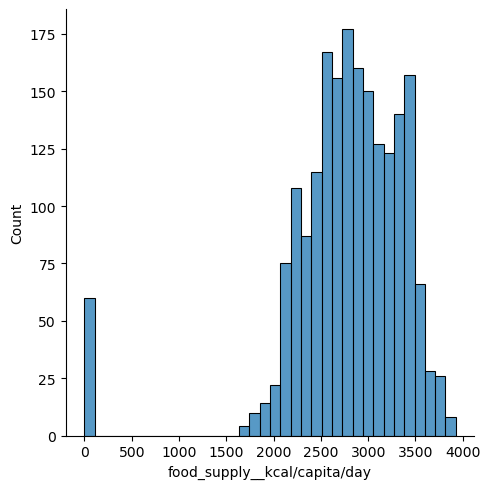

In [34]:
sns.displot(balance_national['food_supply__kcal/capita/day'])
plt.show()

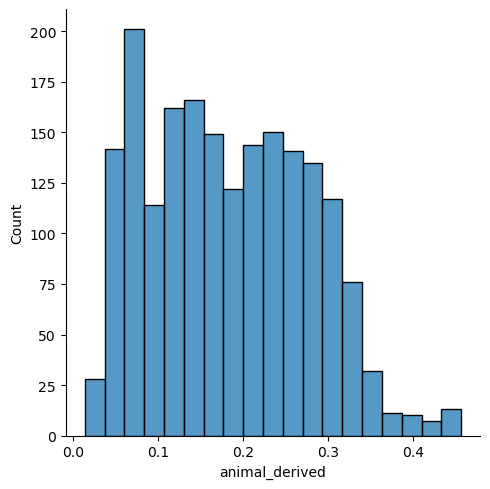

In [38]:
sns.displot(balance_national['animal_derived'])
plt.show()

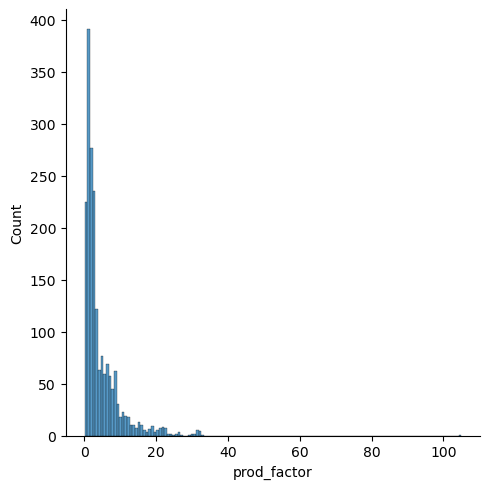

In [39]:
sns.displot(balance_national['prod_factor'])
plt.show()

In [56]:
balance_national.columns

Index(['region_name', 'sub_region_name', 'iso_alpha3_code',
       'least_developed_countries_ldc', 'area', 'year', 'population',
       'food_supply_kcal_per_day', 'food_supply__kcal/capita/day',
       'protein_supply_g_per_day', 'protein_supply_quantity__g/capita/day',
       'fat_supply_g_per_day', 'fat_supply_quantity__g/capita/day',
       'animal_derived', 'requirement kcal_capita_day', 'prod_kcal_per_day',
       'export_kcal_per_day', 'import_kcal_per_day', 'loss_kcal_per_day',
       'prod_factor', 'exp_factor', 'imp_factor', 'loss_factor'],
      dtype='object')

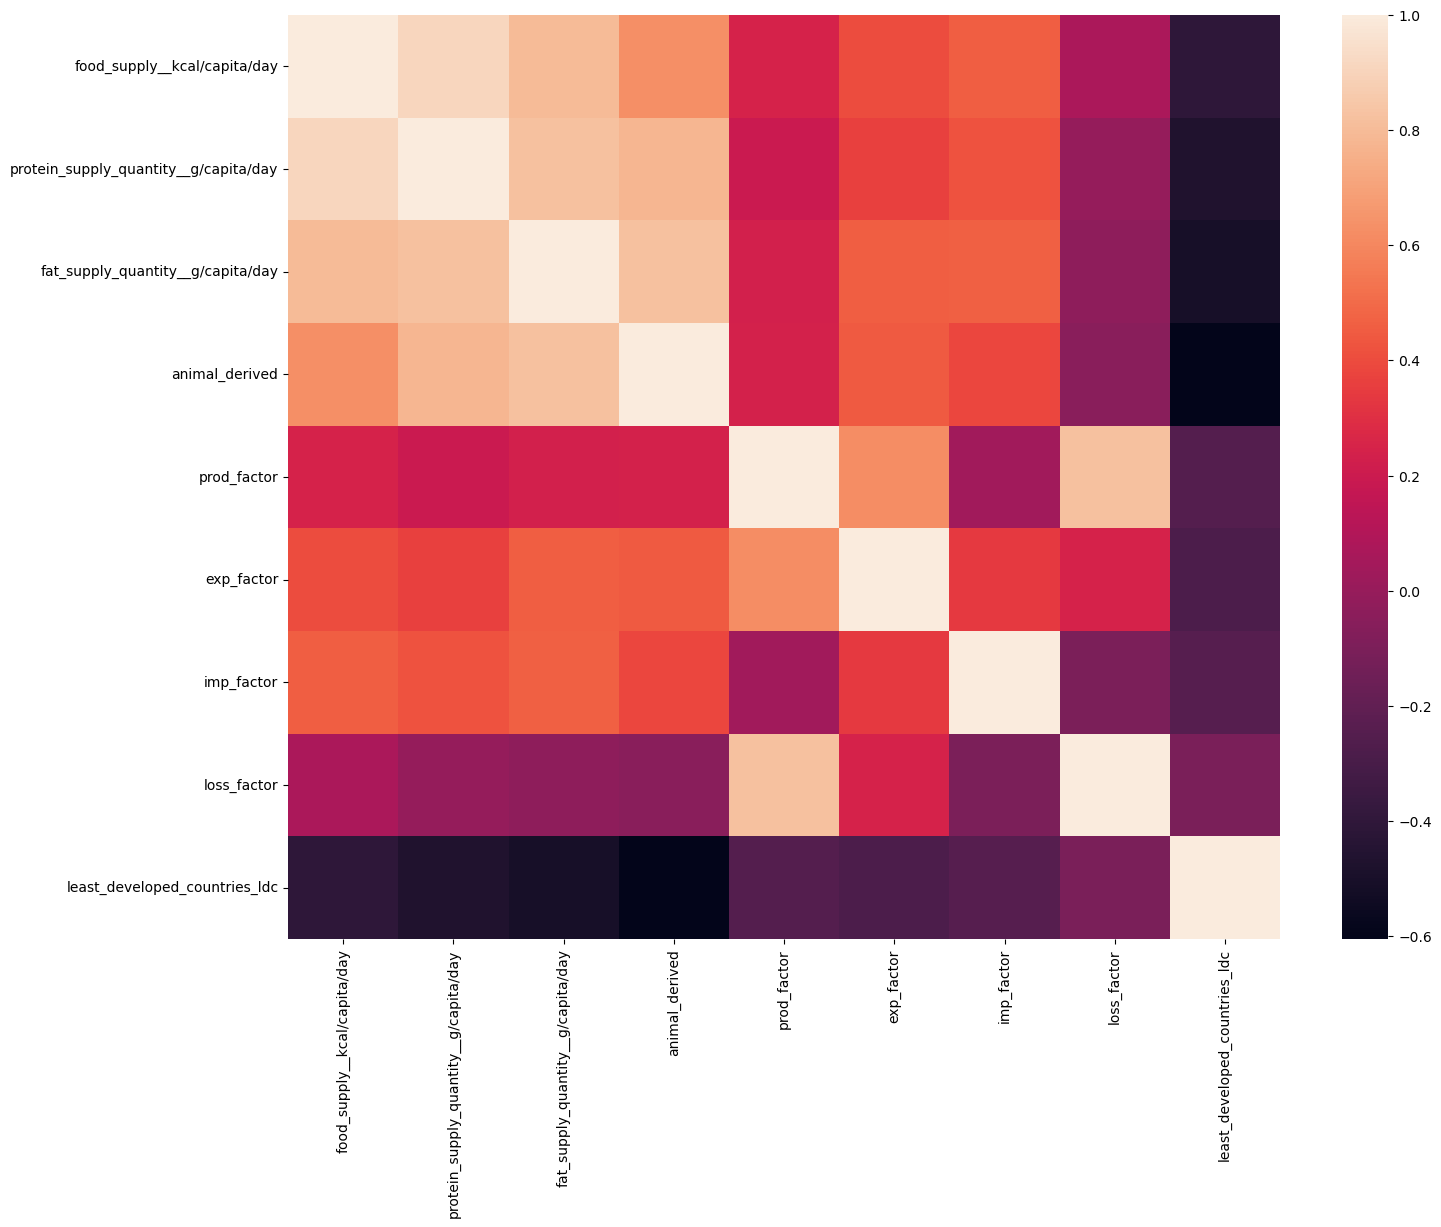

,food_supply__kcal/capita/day,protein_supply_quantity__g/capita/day,fat_supply_quantity__g/capita/day,animal_derived,prod_factor,exp_factor,imp_factor,loss_factor,least_developed_countries_ldc
food_supply__kcal/capita/day,1.000000,0.910865,0.793372,0.628179,0.242197,0.398557,0.456415,0.076876,-0.406010
protein_supply_quantity__g/capita/day,0.910865,1.000000,0.820166,0.777487,0.192341,0.364384,0.422381,-0.005132,-0.472091
fat_supply_quantity__g/capita/day,0.793372,0.820166,1.000000,0.824290,0.230583,0.459084,0.464324,-0.028574,-0.508556
animal_derived,0.628179,0.777487,0.824290,1.000000,0.236208,0.445736,0.381172,-0.050050,-0.604680
prod_factor,0.242197,0.192341,0.230583,0.236208,1.000000,0.622608,0.038225,0.819614,-0.252227
exp_factor,0.398557,0.364384,0.459084,0.445736,0.622608,1.000000,0.339944,0.247527,-0.283530
imp_factor,0.456415,0.422381,0.464324,0.381172,0.038225,0.339944,1.000000,-0.099673,-0.245510
loss_factor,0.076876,-0.005132,-0.028574,-0.050050,0.819614,0.247527,-0.099673,1.000000,-0.103677
least_developed_countries_ldc,-0.406010,-0.472091,-0.508556,-0.604680,-0.252227,-0.283530,-0.245510,-0.103677,1.000000


In [57]:
key_columns = ['food_supply__kcal/capita/day','protein_supply_quantity__g/capita/day',
               'fat_supply_quantity__g/capita/day','animal_derived',
               'prod_factor','exp_factor',
               'imp_factor','loss_factor','least_developed_countries_ldc']

corr_matrix = balance_national[key_columns].corr(method='pearson')
fig, ax = plt.subplots(figsize=(16,12))
ax = sns.heatmap(corr_matrix)
plt.show()

corr_matrix

Some interesting correlations.

Unsurprisingly, there is a strong negative correlation between the 'least_developed_countries_ldc' flag and the kcal, protein and fat availability per capita per day.

There is a strong positive correlation between the kcal, protein and fat availability per capita per day as well as the proportion of kcal derived from Animal Products.

There is also a strong positive correlation between production, exports and losses.

### Total production

Total food availability could have fed far more than the total population.

In [42]:
potential = balance_national[balance_national['year']==2020]['food_supply_kcal_per_day'].sum() / threshold
population = balance_national[balance_national['year']==2020]['population'].sum()

print('Total population in 2020 (bn):                       ', round(population / 1000000000,2))
print('Population that could have been fed in 2020 (bn):   ', round(potential / 1000000000,2))

Total population in 2020 (bn):                        7.71
Population that could have been fed in 2020 (bn):    12.76


### Historical famine dataset

In [43]:
famines = pd.read_csv('processed data/famines.csv').drop(['Unnamed: 0'], axis = 1)
famines

,date,location,excessmortality_midpoint,excessmortality_lower,excessmortality_upper,source,startdate,duration
0,1846-52,Ireland,"1,000,000","1,000,000","1,000,000",Ó Gráda (2007),1846,7
1,1860-1,India,"2,000,000","2,000,000","2,000,000",Kumar and Raychaudhuri [Eds.] (1983),1860,2
2,1863-67,Cape Verde,"30,000","30,000","30,000","Ó Gráda (2009), p. 22",1863,5
3,1866-7,India,"961,043","961,043","961,043",Kumar and Raychaudhuri [Eds.] (1983),1866,2
4,1868,Finland,"100,000","100,000","100,000",Ó Gráda (2009) Table 1.1,1868,1
...,...,...,...,...,...,...,...,...
72,1998-2007,Democratic Republic of Congo,"3,131,500","863,000","5,400,000",Coglan et al (2007); 2009/10 Human Security Re...,1998,10
73,2002,Malawi,"1,650",300,"3,000",Devereux (2002),2002,1
74,2003-05,Sudan (Darfur),"200,000","200,000","200,000",WPF,2003,3
75,2003-06,Uganda,"100,000","100,000","100,000",WPF,2003,4


I want to correlate the famines with country-years in the balance_historic dataset. To do this, I need a list of years for each famine.

In [44]:
years_affected = []
for row in range(len(famines)):
    year_list = []
    for i in range(famines['duration'][row]):
        year_list.append(famines['startdate'][row]+i)
    years_affected.append(year_list)

famines['years_affected'] = years_affected
famines

,date,location,excessmortality_midpoint,excessmortality_lower,excessmortality_upper,source,startdate,duration,years_affected
0,1846-52,Ireland,"1,000,000","1,000,000","1,000,000",Ó Gráda (2007),1846,7,"[1846, 1847, 1848, 1849, 1850, 1851, 1852]"
1,1860-1,India,"2,000,000","2,000,000","2,000,000",Kumar and Raychaudhuri [Eds.] (1983),1860,2,"[1860, 1861]"
2,1863-67,Cape Verde,"30,000","30,000","30,000","Ó Gráda (2009), p. 22",1863,5,"[1863, 1864, 1865, 1866, 1867]"
3,1866-7,India,"961,043","961,043","961,043",Kumar and Raychaudhuri [Eds.] (1983),1866,2,"[1866, 1867]"
4,1868,Finland,"100,000","100,000","100,000",Ó Gráda (2009) Table 1.1,1868,1,[1868]
...,...,...,...,...,...,...,...,...,...
72,1998-2007,Democratic Republic of Congo,"3,131,500","863,000","5,400,000",Coglan et al (2007); 2009/10 Human Security Re...,1998,10,"[1998, 1999, 2000, 2001, 2002, 2003, 2004, 200..."
73,2002,Malawi,"1,650",300,"3,000",Devereux (2002),2002,1,[2002]
74,2003-05,Sudan (Darfur),"200,000","200,000","200,000",WPF,2003,3,"[2003, 2004, 2005]"
75,2003-06,Uganda,"100,000","100,000","100,000",WPF,2003,4,"[2003, 2004, 2005, 2006]"


In [45]:
famines.excessmortality_midpoint = famines.excessmortality_midpoint.str.replace(',' , '').astype(int)
famines.dtypes

date                        object
location                    object
excessmortality_midpoint     int32
excessmortality_lower       object
excessmortality_upper       object
source                      object
startdate                    int64
duration                     int64
years_affected              object
dtype: object

In [46]:
famines_df = pd.DataFrame(columns = ['area','year','mortality','famine'])

area_rows = []
year_rows = []
mortality_rows = []
famine_rows = []

for row in range(len(famines)):
    for year in famines.years_affected[row]:
        location = famines.location[row]
        year = year
        mortality = famines.excessmortality_midpoint[row] / len(famines.years_affected[row])
        famine = 1
        
        area_rows.append(location)
        year_rows.append(year)
        mortality_rows.append(mortality)
        famine_rows.append(famine)

In [47]:
famines_df.area = area_rows
famines_df.year = year_rows
famines_df.mortality = mortality_rows
famines_df.famine = famine_rows

famines_df.head(10)

,area,year,mortality,famine
0,Ireland,1846,142857.142857,1
1,Ireland,1847,142857.142857,1
2,Ireland,1848,142857.142857,1
3,Ireland,1849,142857.142857,1
4,Ireland,1850,142857.142857,1
5,Ireland,1851,142857.142857,1
6,Ireland,1852,142857.142857,1
7,India,1860,1000000.000000,1
8,India,1861,1000000.000000,1
9,Cape Verde,1863,6000.000000,1


In [48]:
famines_df[famines_df.year > 1960].area.value_counts()

Democratic Republic of Congo    10
Indonesia                        7
West Africa (Sahel)              6
Somalia                          6
Uganda                           6
North Korea                      5
Ethiopia (Wallo & Tigray)        4
Mozambique                       4
Sudan (Darfur)                   3
Nigeria (Biafra)                 3
Ethiopia                         3
India (Maharashtra)              2
Sudan (Darfur, Kordofan)         2
Malawi                           1
Sudan (Baht el Ghazal)           1
China                            1
Sudan (south)                    1
Ethiopia (Wallo)                 1
Cambodia                         1
Bangladesh                       1
Chad                             1
Name: area, dtype: int64

In [50]:
country_list = balance_historic_national.area.unique()
country_list

array(['Afghanistan', 'Albania', 'Algeria', 'Angola',
       'Antigua and Barbuda', 'Argentina', 'Armenia', 'Australia',
       'Austria', 'Azerbaijan', 'Bahamas', 'Bangladesh', 'Barbados',
       'Belarus', 'Belgium', 'Belize', 'Benin', 'Bermuda',
       'Bolivia (Plurinational State of)', 'Bosnia and Herzegovina',
       'Botswana', 'Brazil', 'Brunei Darussalam', 'Bulgaria',
       'Burkina Faso', 'Cabo Verde', 'Cambodia', 'Cameroon', 'Canada',
       'Central African Republic', 'Chad', 'Chile', 'China', 'Colombia',
       'Congo', 'Costa Rica', 'Croatia', 'Cuba', 'Cyprus', 'Czechia',
       "Democratic People's Republic of Korea", 'Denmark', 'Djibouti',
       'Dominica', 'Dominican Republic', 'Ecuador', 'Egypt',
       'El Salvador', 'Estonia', 'Eswatini', 'Ethiopia', 'Fiji',
       'Finland', 'France', 'French Polynesia', 'Gabon', 'Gambia',
       'Georgia', 'Germany', 'Ghana', 'Greece', 'Grenada', 'Guatemala',
       'Guinea', 'Guinea-Bissau', 'Guyana', 'Haiti', 'Honduras',
     

We need to align the names of the affected areas to merge the datasets.

For simplicity, the West Africa (Sahel) famine has been allocated to Niger, the largest country affected.

In [52]:
famines_df.area = famines_df.area.replace({"Democratic Republic of Congo":"Congo",
                                           "West Africa (Sahel)":"Niger",
                                           "North Korea":"Democratic People's Republic of Korea",
                                           "Ethiopia (Wallo & Tigray)":"Ethiopia",
                                           "Sudan (Darfur)":"Sudan",
                                           "Nigeria (Biafra)":"Nigeria",
                                           "India (Maharashtra)":"India",
                                           "Sudan (Darfur, Kordofan)":"Sudan",
                                           "Sudan (Baht el Ghazal)":"Sudan",
                                           "Sudan (south)":"Sudan",
                                           "Ethiopia (Wallo)":"Ethiopia"})

famines_df

,area,year,mortality,famine
0,Ireland,1846,142857.142857,1
1,Ireland,1847,142857.142857,1
2,Ireland,1848,142857.142857,1
3,Ireland,1849,142857.142857,1
4,Ireland,1850,142857.142857,1
...,...,...,...,...
236,Uganda,2003,25000.000000,1
237,Uganda,2004,25000.000000,1
238,Uganda,2005,25000.000000,1
239,Uganda,2006,25000.000000,1


In [53]:
balance_famine = pd.merge(left = balance_historic_national,
                                       right = famines_df,
                                       how = 'left',
                                       left_on=['area','year'],
                                       right_on = ['area','year'])

balance_famine = balance_famine.fillna(0)
balance_famine.head()

,region_name,sub_region_name,iso_alpha3_code,least_developed_countries_ldc,area,year,population,food_supply_kcal_per_day,food_supply__kcal/capita/day,protein_supply_g_per_day,protein_supply_quantity__g/capita/day,fat_supply_g_per_day,fat_supply_quantity__g/capita/day,animal_derived,requirement kcal_capita_day,mortality,famine
0,Asia,Southern Asia,AFG,1,Afghanistan,1961,8954000.0,2.685305e+10,2999.0,760284140.0,84.91,335864540.0,37.51,0.082361,1.611720e+10,0.0,0.0
1,Asia,Southern Asia,AFG,1,Afghanistan,1962,9142000.0,2.666721e+10,2917.0,758603160.0,82.98,343830620.0,37.61,0.083990,1.645560e+10,0.0,0.0
2,Asia,Southern Asia,AFG,1,Afghanistan,1963,9340000.0,2.519932e+10,2698.0,720300800.0,77.12,360243800.0,38.57,0.096368,1.681200e+10,0.0,0.0
3,Asia,Southern Asia,AFG,1,Afghanistan,1964,9547000.0,2.819229e+10,2953.0,797079030.0,83.49,371855650.0,38.95,0.089062,1.718460e+10,0.0,0.0
4,Asia,Southern Asia,AFG,1,Afghanistan,1965,9765000.0,2.886534e+10,2956.0,818892900.0,83.86,387963450.0,39.73,0.092693,1.757700e+10,0.0,0.0


In [54]:
famine_countries = list(balance_famine[balance_famine.famine == 1].area.unique())
famine_countries

['Bangladesh',
 'Cambodia',
 'Chad',
 'China',
 'Congo',
 "Democratic People's Republic of Korea",
 'Ethiopia',
 'India',
 'Indonesia',
 'Malawi',
 'Mozambique',
 'Niger',
 'Nigeria',
 'Sudan',
 'Uganda']

In [55]:
balance_famine = balance_famine[balance_famine['area'].isin(famine_countries)==True]
# balance_famine.to_csv('presentation data/balance_famine.csv')

### Clustering the countries

As an interesting exercise, we might cluster the countries based on the per_capita_per_day parameters in the 'balance' dataset across the 2010-2020 period.

In [58]:
balance_national.columns

Index(['region_name', 'sub_region_name', 'iso_alpha3_code',
       'least_developed_countries_ldc', 'area', 'year', 'population',
       'food_supply_kcal_per_day', 'food_supply__kcal/capita/day',
       'protein_supply_g_per_day', 'protein_supply_quantity__g/capita/day',
       'fat_supply_g_per_day', 'fat_supply_quantity__g/capita/day',
       'animal_derived', 'requirement kcal_capita_day', 'prod_kcal_per_day',
       'export_kcal_per_day', 'import_kcal_per_day', 'loss_kcal_per_day',
       'prod_factor', 'exp_factor', 'imp_factor', 'loss_factor'],
      dtype='object')

In [60]:
cluster_data = balance_national.groupby(['area']).agg({'food_supply__kcal/capita/day':np.mean,
                                                       'protein_supply_quantity__g/capita/day':np.mean,
                                                       'fat_supply_quantity__g/capita/day':np.mean,
                                                       'animal_derived':np.mean,
                                                       'prod_factor':np.mean,
                                                       'exp_factor':np.mean,
                                                       'imp_factor':np.mean,
                                                       'loss_factor':np.mean}).reset_index()
cluster_data

,area,food_supply__kcal/capita/day,protein_supply_quantity__g/capita/day,fat_supply_quantity__g/capita/day,animal_derived,prod_factor,exp_factor,imp_factor,loss_factor
0,Afghanistan,2224.454545,58.154545,38.803636,0.090726,1.053172,0.020446,0.562037,0.125049
1,Albania,3282.636364,111.277273,111.453636,0.297186,2.251017,0.034569,1.061364,0.197122
2,Algeria,3400.636364,90.117273,93.924545,0.119934,1.144213,0.082491,1.915545,0.182070
3,Angola,2428.090909,51.655455,57.804545,0.089160,1.579540,0.016008,0.553804,0.180789
4,Antigua and Barbuda,2412.272727,80.186364,93.212727,0.312889,0.210233,0.008293,1.712880,0.007623
...,...,...,...,...,...,...,...,...,...
175,Venezuela (Bolivarian Republic of),2563.090909,65.408182,90.180000,0.160379,1.210127,0.003326,0.918869,0.053821
176,Viet Nam,2855.818182,82.635455,74.443636,0.204925,2.994851,0.689259,0.658153,0.218156
177,Yemen,2119.818182,56.357273,42.466364,0.073726,0.292354,0.030395,1.109780,0.032678
178,Zambia,2128.545455,56.872727,49.826364,0.074929,3.288871,0.228870,0.120396,0.150031


In [61]:
from sklearn.preprocessing import MinMaxScaler

X = cluster_data.drop(['area'],axis=1)
y = cluster_data['area']

scaler = MinMaxScaler()

X_scaled = scaler.fit_transform(X)
X_scaled

array([[0.54403268, 0.3700306 , 0.18073981, ..., 0.00221826, 0.03989659,
        0.08052781],
       [0.85684341, 0.7927956 , 0.63322632, ..., 0.00375059, 0.08202745,
        0.12694047],
       [0.89172557, 0.62439861, 0.52404976, ..., 0.00894977, 0.1540993 ,
        0.11724746],
       ...,
       [0.51310096, 0.35572742, 0.2035524 , ..., 0.00329764, 0.08611259,
        0.02104343],
       [0.51568085, 0.35982955, 0.24939274, ..., 0.02483118, 0.00263294,
        0.09661525],
       [0.51140792, 0.38100578, 0.3721187 , ..., 0.00621221, 0.03302956,
        0.07155989]])

C:\Users\eliza\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\eliza\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\eliza\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\eliza\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Window

Text(0.5, 1.0, 'Elbow Method showing the optimal k')

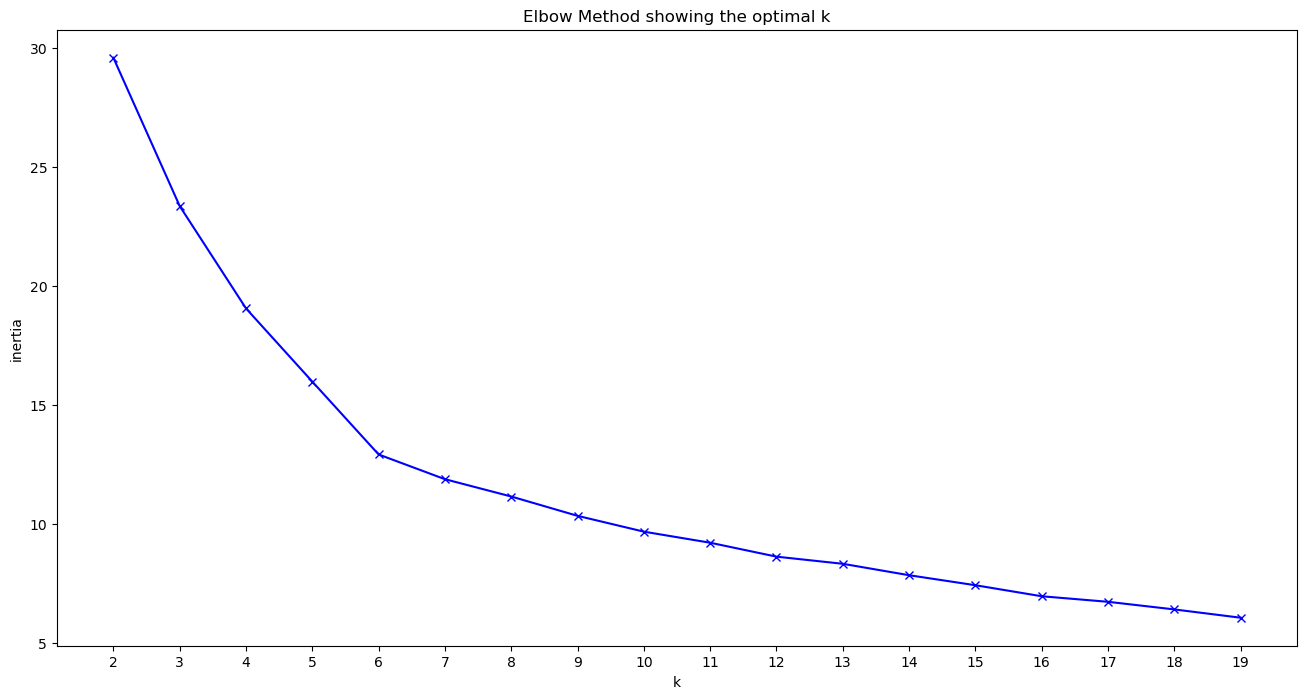

In [62]:
from sklearn import cluster
from sklearn.cluster import KMeans

K = range(2, 20)
inertia = []

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=1234, n_init = 10)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(16,8))
plt.plot(K, inertia, 'bx-')
plt.xlabel('k')
plt.ylabel('inertia')
plt.xticks(np.arange(min(K), max(K)+1, 1.0))
plt.title('Elbow Method showing the optimal k')

C:\Users\eliza\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\eliza\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\eliza\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\eliza\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Window

Text(0.5, 1.0, 'Slhouette score showing the optimal k')

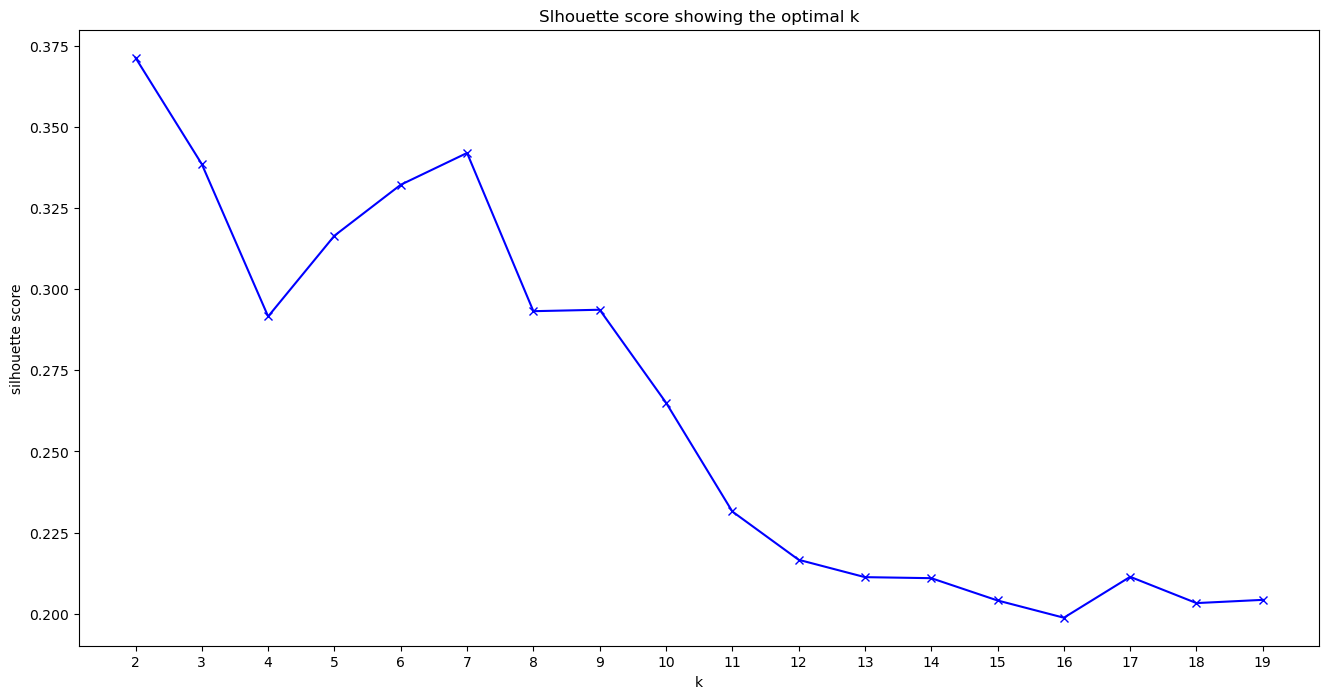

In [63]:
from sklearn.metrics import silhouette_score
K = range(2, 20)
silhouette = []

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=1234, n_init = 10)
    kmeans.fit(X_scaled)
    silhouette.append(silhouette_score(X_scaled, kmeans.predict(X_scaled)))


plt.figure(figsize=(16,8))
plt.plot(K, silhouette, 'bx-')
plt.xlabel('k')
plt.ylabel('silhouette score')
plt.xticks(np.arange(min(K), max(K)+1, 1.0))
plt.title('Slhouette score showing the optimal k')

In [69]:
kmeans = KMeans(n_clusters=7, random_state=1234, n_init = 10)
kmeans.fit(X_scaled)
cluster = kmeans.predict(X_scaled)

cluster_data['cluster'] = cluster

cluster_data['cluster'].value_counts()

C:\Users\eliza\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


0    63
2    56
1    35
6    11
3     7
4     6
5     2
Name: cluster, dtype: int64

In [74]:
cluster_data[cluster_data['cluster']==3].area

11                              Bahrain
18                               Bhutan
25                              Burundi
105    Micronesia (Federated States of)
112                               Nauru
130                               Qatar
150                         South Sudan
Name: area, dtype: object